In [0]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import os
import patoolib

In [0]:
#patoolib.extract_archive("cat_dog_small.rar", outdir=".")
train_dir = os.path.join("cat_dog_small","train")
validation_dir = os.path.join("cat_dog_small","validation")

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                                   shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),
                                                        batch_size=32,class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation="relu"))
model.add(Conv2D(256,(3,3),activation="relu"))
model.add(Conv2D(256,(3,3),activation="relu"))
model.add(Conv2D(256,(3,3),activation="relu"))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(512,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 146, 146, 32)      9248      
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 144, 144, 32)      9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 70, 70, 64)        18496     
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 68, 68, 64)        36928     
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 66, 66, 64)        36928     
__________

In [0]:
model.compile(loss="binary_crossentropy",optimizer=RMSprop(lr=1e-4),metrics=["accuracy"])

In [25]:
history = model.fit_generator(train_generator,epochs=30,steps_per_epoch=100,validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
 12/100 [==>...........................] - ETA: 48s - loss: 0.6946 - acc: 0.5130

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expect

 99/100 [============================>.] - ETA: 0s - loss: 0.6935 - acc: 0.4987

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expe

100/100 [==============================] - 44s 439ms/step - loss: 0.6934 - acc: 0.4997 - val_loss: 0.6929 - val_acc: 0.5032
Epoch 2/30
100/100 [==============================] - 39s 394ms/step - loss: 0.6912 - acc: 0.5388 - val_loss: 0.6842 - val_acc: 0.5284
Epoch 3/30
100/100 [==============================] - 40s 399ms/step - loss: 0.6718 - acc: 0.5844 - val_loss: 0.6648 - val_acc: 0.6180
Epoch 4/30
100/100 [==============================] - 39s 392ms/step - loss: 0.6687 - acc: 0.5994 - val_loss: 0.6736 - val_acc: 0.6018
Epoch 5/30
100/100 [==============================] - 40s 397ms/step - loss: 0.6698 - acc: 0.5928 - val_loss: 0.6517 - val_acc: 0.6180
Epoch 6/30
100/100 [==============================] - 40s 398ms/step - loss: 0.6512 - acc: 0.6113 - val_loss: 0.6368 - val_acc: 0.6314
Epoch 7/30
100/100 [==============================] - 40s 395ms/step - loss: 0.6530 - acc: 0.6234 - val_loss: 0.6496 - val_acc: 0.5933
Epoch 8/30
100/100 [==============================] - 40s 396ms/st

In [0]:
model.save("cat_dog_small_2.h5")

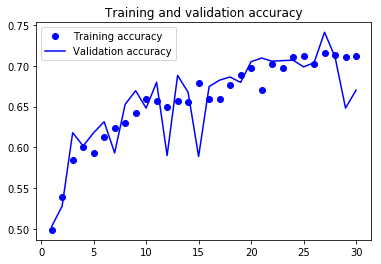

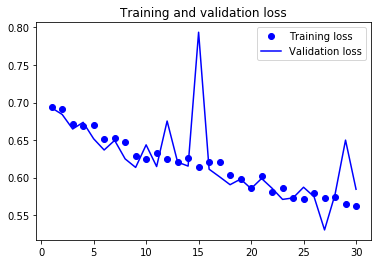

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="Training accuracy")
plt.plot(epochs,val_acc,'b',label="Validation accuracy")
plt.legend()
plt.title("Training and validation accuracy")
plt.figure()
plt.plot(epochs,loss,'bo',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend()
plt.title("Training and validation loss")

plt.show()
